<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Explainable-AI/Integrating_XAI_to_hybrid_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model

In [7]:
#Loading the newly trained VIT model
model = load_model('/content/drive/MyDrive/dsgp_models/Brain_Tumour_Classification_hybrid_model.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 78 variables whereas the saved optimizer has 154 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [4]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=975f5e7bb239085e6d0a692d3837242318fb1f2f0164c787f490fd438b5218ab
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 78 variables whereas the saved optimizer has 154 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: Glioblastoma


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 572ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 926ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

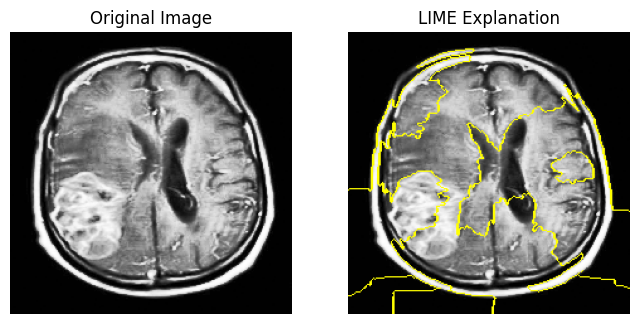

In [22]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the trained hybrid model
model_path = '/content/drive/MyDrive/dsgp_models/Brain_Tumour_Classification_hybrid_model.keras'
hybrid_model = tf.keras.models.load_model(model_path)

# Define class labels
class_labels = ["Astrocitoma", "Carcinoma", "Ependimoma", "Ganglioglioma", "Germinoma", "Glioblastoma", "Granuloma", "Meduloblastoma",
                "Neurocitoma", "Oligodendroglioma", "Papiloma", "Schwannoma", "Tuberculoma", "meningioma", "no tumour", "pituitary"]

# Define image preprocessing function
def preprocess_image(img_path):
    """Load and preprocess an image for model prediction."""
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    image = np.stack([image] * 3, axis=-1)
    image = image.astype(np.float32) / 255.0
    return image

# Load a test image
test_image_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png"
test_image = preprocess_image(test_image_path)

test_image_exp = np.expand_dims(test_image, axis=0)

# Prediction
predictions = hybrid_model.predict(test_image_exp)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f"Predicted Class: {class_labels[predicted_class]}")

# Create LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)  # Convert list to NumPy array
    return hybrid_model.predict(images)  # Get model predictions

# Apply LIME to explain model decision
explanation = explainer.explain_instance(
    test_image, predict_fn, top_labels=1, hide_color=0, num_samples=1000
)

# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=10, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(test_image, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()


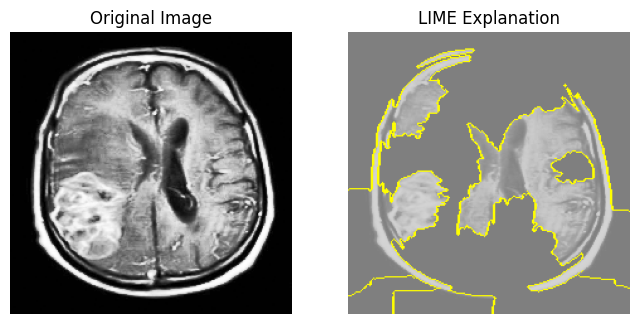

In [51]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=10, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

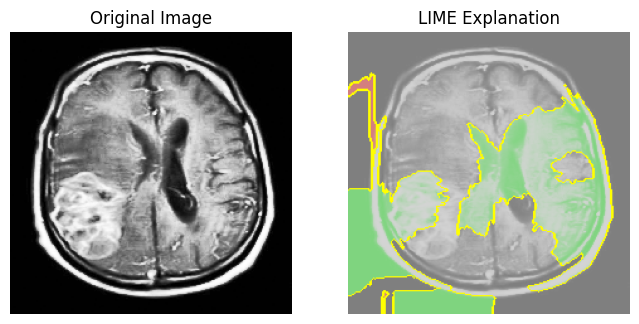

In [52]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=10, hide_rest=False)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

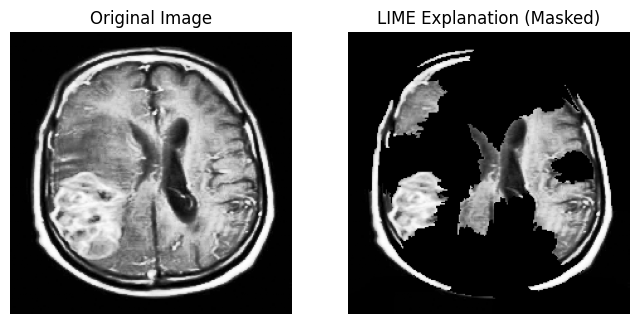

In [53]:
# Get explanation mask
label = explanation.top_labels[0]
_, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=10, hide_rest=True)

# Apply mask to the original grayscale image
masked_image = test_image[:, :, 0] * mask  # Zero out areas outside the boundary

# Display results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image[:, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masked_image, cmap='gray')
plt.title("LIME Explanation (Masked)")
plt.axis("off")

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 78 variables whereas the saved optimizer has 154 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: meningioma


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 918ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/

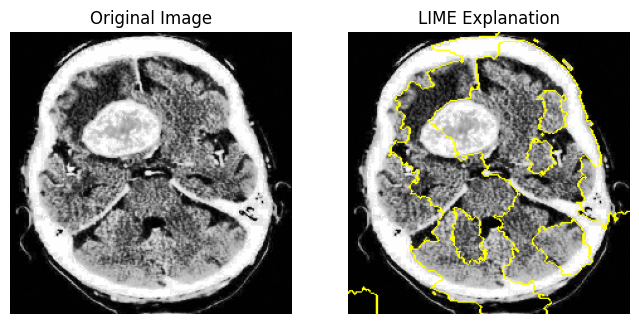

In [73]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the trained hybrid model
model_path = '/content/drive/MyDrive/dsgp_models/Brain_Tumour_Classification_hybrid_model.keras'
hybrid_model = tf.keras.models.load_model(model_path)

# Define class labels
class_labels = ["Astrocitoma", "Carcinoma", "Ependimoma", "Ganglioglioma", "Germinoma", "Glioblastoma", "Granuloma", "Meduloblastoma",
                "Neurocitoma", "Oligodendroglioma", "Papiloma", "Schwannoma", "Tuberculoma", "meningioma", "no tumour", "pituitary"]

# Define image preprocessing function
def preprocess_image(img_path):
    """Load and preprocess an image for model prediction."""
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    image = np.stack([image] * 3, axis=-1)
    image = image.astype(np.float32) / 255.0
    return image

# Load a test image
test_image_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/meningioma/image_30020.png"
test_image = preprocess_image(test_image_path)

# Expand dimensions to match model input shape
test_image_exp = np.expand_dims(test_image, axis=0)  # Shape (1, 224, 224, 3)

# Make a prediction
predictions = hybrid_model.predict(test_image_exp)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f"Predicted Class: {class_labels[predicted_class]}")

# Create LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)  # Convert list to NumPy array
    return hybrid_model.predict(images)  # Get model predictions

# Apply LIME to explain model decision
explanation = explainer.explain_instance(
    test_image, predict_fn, top_labels=1, hide_color=0, num_samples=1000
)

# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(test_image, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()


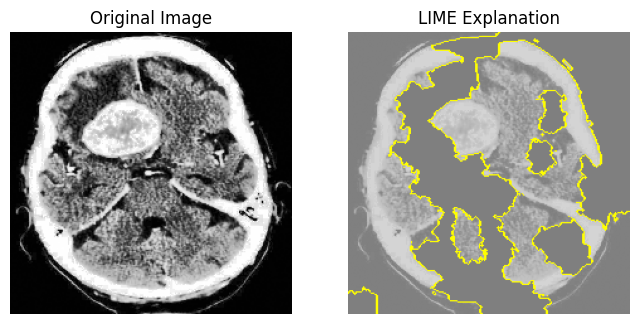

In [75]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

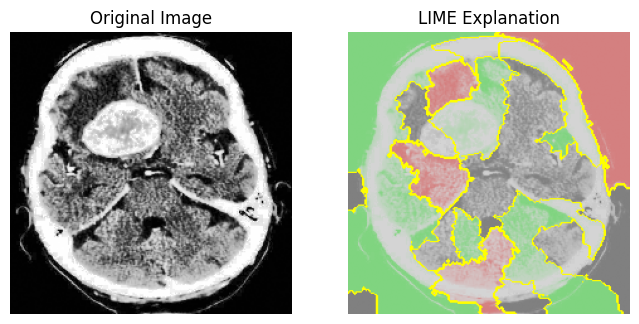

In [74]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

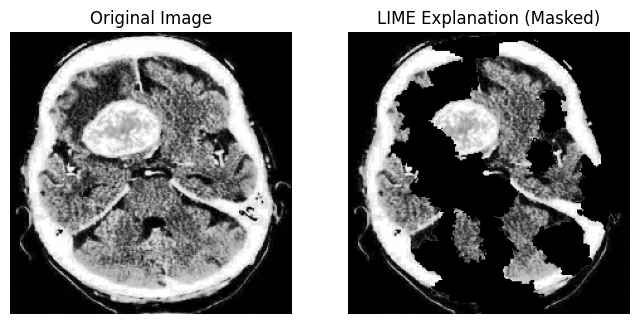

In [77]:
# Get explanation mask
label = explanation.top_labels[0]
_, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

# Apply mask to the original grayscale image
masked_image = test_image[:, :, 0] * mask  # Zero out areas outside the boundary

# Display results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image[:, :, 0], cmap='gray')  # Original grayscale image
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masked_image, cmap='gray')  # Show only areas inside the boundary
plt.title("LIME Explanation (Masked)")
plt.axis("off")

plt.show()